# 逻辑回归
- 任务：二分类
- 输入：二维特征
- 标签：正类或者负类

### 1. 数据预处理

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filepath = './data/datasets_374192_727480_data.csv'

In [2]:
import pandas as pd

In [3]:
data = np.loadtxt(filepath,delimiter=',')

In [4]:
x_total = data[:,1:3]
y_total = data[:,3]

In [5]:
pos_index = np.where(y_total==1)
neg_index = np.where(y_total==0)

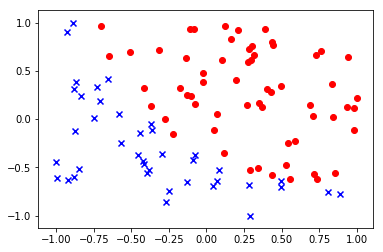

数据集大小:  100


In [6]:
plt.scatter(x_total[pos_index,0],x_total[pos_index,1],marker='o',c='r')
plt.scatter(x_total[neg_index,0],x_total[neg_index,1],marker='x',c='b')
plt.show()

print('数据集大小: ',x_total.shape[0])

### 2. Sklearn

In [7]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(x_total,y_total)
print(model.coef_[0])
print(model.intercept_)

y_pred = model.predict(x_total)
print("accuracy:", (y_pred==y_total).mean())

[2.79739336 2.57559894]
[0.51625502]
accuracy: 0.89


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 3. 梯度下降

$
\begin{aligned}
\frac{\partial}{\partial w_1} L(w,b) = \frac{1}{N}\sum_{i=1}^N (f(x^{(i)}) - y^{(i)}) x^{(i)}_1
\end{aligned}
$

$
\begin{aligned}
\frac{\partial}{\partial b} L(w,b) = \frac{1}{N} \sum_{i=1}^N (f(x^{(i)}) - y^{(i)})
\end{aligned}
$

In [11]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def cross_entropy(y,y_pred):
    return (-y * np.log(y_pred)) - ((1-y) * np.log(1-y_pred))

nums_epoch = 1500
learn_rate = 0.1

weight = np.zeros(3)
x_train = np.hstack([x_total,np.ones((x_total.shape[0],1))])

loss_list = []
for i in range(nums_epoch):
    y_pred = sigmoid(np.dot(x_train,weight))
    loss = cross_entropy(y_total,y_pred).mean()
    loss_list.append(loss)
    
    weight = weight - learn_rate * (x_train * np.tile((y_pred - y_total).reshape([-1,1]),3)).mean(axis=0)
    
y_pred = np.where(np.dot(x_train,weight)>0,1,0)
print("accuracy:",(y_pred==y_total).mean())

accuracy: 0.89


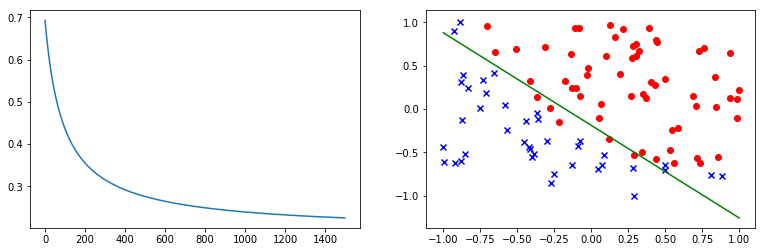

In [12]:
plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.plot(np.arange(1500), loss_list)
plt.subplot(122)
plot_x = np.linspace(-1.0, 1.0, 100)
plot_y = - (weight[0] * plot_x + weight[2]) / weight[1]
plt.scatter(x_total[pos_index, 0], x_total[pos_index, 1], marker='o', c='r')
plt.scatter(x_total[neg_index, 0], x_total[neg_index, 1], marker='x', c='b')
plt.plot(plot_x, plot_y, c='g')
plt.show()